In [ ]:
# Import the yfinance library to fetch financial data
import yfinance as yf
# Import datetime for handling date operations
from datetime import datetime
# Import Matplotlib for data visualization
import matplotlib.pyplot as plt
# Import Pandas for data manipulation and analysis
import pandas as pd
# Import NumPy for numerical operations
import numpy as np
# mathematical calculation
import math
from statsmodels.tsa.arima.model import ARIMA ## arima model
# moving average of squared gradients, which helps in controlling the learning rate.
from tensorflow.keras.optimizers import RMSprop
# suitable choice for regression problems with potential outliers.
from tensorflow.keras.losses import Huber
# Import Seaborn for enhanced data visualization
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
# Import TensorFlow, a deep learning library
import tensorflow as tf
# Import LSTM layer from Keras for building LSTM models
from keras.layers import LSTM
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf ## for auto and partial auto correlation factor
from statsmodels.tsa.seasonal import seasonal_decompose  # For seasonal decomposition
from statsmodels.tsa.stattools import adfuller  # For the Dickey-Fuller test
# Import Sequential model type from TensorFlow Keras API for building neural network models
from tensorflow.keras.models import Sequential
# Import metrics for evaluating model performance
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,r2_score
# Import GRU, Dense, and Dropout layers from TensorFlow Keras API
from tensorflow.keras.layers import GRU, Dense, Dropout
# Import additional layers from Keras for building more complex models
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
# Import Sequential model type again (seems redundant, already imported above)
from keras.models import Sequential
# Import MinMaxScaler for normalizing data
from sklearn.preprocessing import MinMaxScaler
# Import warnings to handle warning messages
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
# Define the ticker symbol for crude oil
ticker_symbol = "CL=F"
# Define the ticker symbol (e.g., crude oil futures symbol)
ticker_symbol = "CL=F"
# Set the start and end dates for the data
start_date = "2000-01-01"  # Adjust as needed
end_date = "2024-07-09"  # Adjust as needed
# Fetch the data from Yahoo Finance
crude_price_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d')
# Ensure the index is in the correct format
crude_price_data.index = pd.to_datetime(crude_price_data.index).strftime('%Y-%m-%d')
crude_price_data.index.name = 'Date'
# Reset column names to remove multi-level index
crude_price_data.columns = crude_price_data.columns.droplevel(1)  # Drop the first level of the MultiIndex
crude_price_data.columns.name = None  # Remove the name of the columns
# Display the last 15 entries of the data
print(crude_price_data)


[*********************100%***********************]  1 of 1 completed

                Close       High        Low       Open  Volume
Date                                                          
2000-08-23  32.049999  32.799999  31.950001  31.950001   79385
2000-08-24  31.629999  32.240002  31.400000  31.900000   72978
2000-08-25  32.049999  32.099998  31.320000  31.700001   44601
2000-08-28  32.869999  32.919998  31.860001  32.040001   46770
2000-08-29  32.720001  33.029999  32.560001  32.820000   49131
...               ...        ...        ...        ...     ...
2024-07-01  83.379997  83.639999  81.379997  81.449997  345780
2024-07-02  82.809998  84.379997  82.720001  83.430000  367787
2024-07-03  83.879997  83.930000  82.459999  83.199997  289685
2024-07-05  83.160004  84.519997  83.019997  83.599998  361357
2024-07-08  82.330002  83.320000  82.080002  83.150002  251774

[5992 rows x 5 columns]


## DATA ANALYSIS AND PREPROCESSING

In [ ]:
crude_price_data.isnull().sum()## checking null values

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
crude_price_data.describe()

,Close,High,Low,Open,Volume
count,5992.000000,5992.000000,5992.000000,5992.000000,5.992000e+03
mean,64.502310,65.504244,63.440723,64.507855,3.037582e+05
std,25.289175,25.550336,24.981635,25.280440,2.118964e+05
min,-37.630001,13.690000,-40.320000,-14.000000,0.000000e+00
25%,45.330002,46.220001,44.349998,45.307501,1.183438e+05
50%,63.099998,63.810001,62.125000,63.000000,2.743675e+05
75%,83.279997,84.522497,82.072500,83.284998,3.973038e+05
max,145.289993,147.270004,143.220001,145.190002,2.288230e+06


In [ ]:
# Reset the index of the crude_price_data DataFrame
crude_price_data = crude_price_data.reset_index()
# Convert the 'Date' column to datetime format
crude_price_data['Date'] = pd.to_datetime(crude_price_data['Date'])


## DATA VISUALIZATION

In [ ]:
# Plotting the Close prices using Plotly
fig = px.line(crude_price_data, x='Date', y='Close', title='Crude Oil Prices Over Time')
# Show the plot
fig.show()

In [ ]:
# Plot Open, High, Low, and Close prices on the same graph
fig_ohlc = go.Figure()
fig_ohlc.add_trace(go.Scatter(x=crude_price_data['Date'], y=crude_price_data['Open'], mode='lines', name='Open'))
fig_ohlc.add_trace(go.Scatter(x=crude_price_data['Date'], y=crude_price_data['High'], mode='lines', name='High'))
fig_ohlc.add_trace(go.Scatter(x=crude_price_data['Date'], y=crude_price_data['Low'], mode='lines', name='Low'))
fig_ohlc.add_trace(go.Scatter(x=crude_price_data['Date'], y=crude_price_data['Close'], mode='lines', name='Close'))
fig_ohlc.update_layout(title='Crude Oil OHLC Prices Over Time', xaxis_title='Date', yaxis_title='Price')
fig_ohlc.show()

In [ ]:
# Plotting the Volume
fig_volume = px.bar(crude_price_data, x='Date', y='Volume', title='Crude Oil Trading Volume Over Time')
# Show the plot
fig_volume.show()

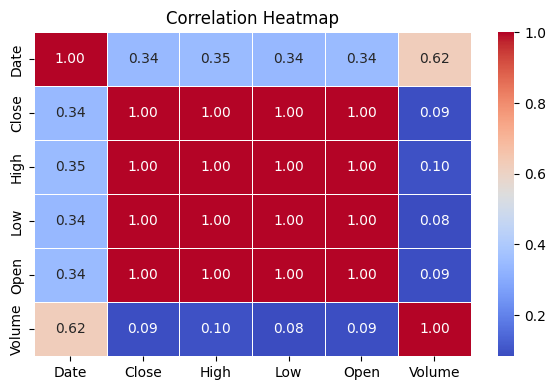

In [ ]:
# Calculate the correlation matrix
corr_matrix = crude_price_data.corr()
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Add title and adjust layout
plt.title('Correlation Heatmap')
plt.tight_layout()
# Show plot
plt.show()

## SPLITTING THE DATASET IN TRAINING TESTING AND VALIDATION

In [ ]:
# Extract year from the date
crude_price_data['Year'] = crude_price_data['Date'].dt.year
# Define the years for training, validation, and testing
train_years = range(2000, 2018)   # Example: 2000-2018
val_years = range(2018, 2022)     # Example: 2018-2022
test_years = range(2022, 2025)    # Example: 2022-2025
# Split the data based on the defined years
train = crude_price_data[crude_price_data['Year'].isin(train_years)]
validation = crude_price_data[crude_price_data['Year'].isin(val_years)]
test = crude_price_data[crude_price_data['Year'].isin(test_years)]
# Print the shapes of the split sets
print("Training set shape:", train.shape)
print("Validation set shape:", validation.shape)
print("Test set shape:", test.shape)

Training set shape: (4354, 7)
Validation set shape: (1008, 7)
Test set shape: (630, 7)


In [ ]:
train_data = train.filter(['Close'])
train_set = train_data.values
test_data = test.filter(['Close'])
test_set = test_data.values
validation_data = validation.filter(['Close'])
validation_set = validation_data.values
train_set.shape,test_set.shape,validation_set.shape

((4354, 1), (630, 1), (1008, 1))

## DEFINING THE EVALUATION PARAMETERS

In [ ]:
def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean absolute percentage error (MAPE) value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mse(y_true, y_pred):
    """
    Calculate Mean Square Error (MSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean square error (MSE) value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) ** 2)

def calculate_rmse(y_true, y_pred):
    """
    Calculate Root Mean Square Error (RMSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The root mean square error (RMSE) value.
    """
    mse_value = calculate_mse(y_true, y_pred)
    return math.sqrt(mse_value)

def calculate_r2(y_true, y_pred):
    """
    Calculate R-squared (R²).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The R-squared (R²) value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [ ]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
Scaled_training_data = scaler.fit_transform(train_set)
Scaled_validation_data = scaler.fit_transform(validation_set)
Scaled_test_data = scaler.fit_transform(test_set)

## RESHAPING THE TRAINING DATASET INTO PROPER SHAPE

In [ ]:
new_step_count = 50
X_train_data = []
y_train_data = []
for i in range(len(train) - new_step_count):
    X_train_data.append(Scaled_training_data[i:i + new_step_count, 0])
    y_train_data.append(Scaled_training_data[new_step_count + i, 0])
# Convert the lists to NumPy arrays
X_train_data = np.array(X_train_data)
y_train_data = np.array(y_train_data)
# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_train_data = np.reshape(X_train_data, (X_train_data.shape[0], X_train_data.shape[1], 1))
y_train_data = y_train_data.reshape(y_train_data.shape[0], 1)
print(X_train_data.shape, y_train_data.shape)


(4304, 50, 1) (4304, 1)


## RESHAPING THE TESTING DATASET INTO PROPER SHAPE

In [ ]:
new_step_count = 50
# For the test set
X_test_data = []
y_test_data = []
for i in range(len(test) - new_step_count):
    X_test_data.append(Scaled_test_data[i:i + new_step_count, 0])
    y_test_data.append(Scaled_test_data[new_step_count + i, 0])

# Convert the lists to NumPy arrays
X_test_data = np.array(X_test_data)
y_test_data = np.array(y_test_data)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test_data = np.reshape(X_test_data, (X_test_data.shape[0], X_test_data.shape[1], 1))
y_test_data = y_test_data.reshape(y_test_data.shape[0], 1)

print(X_test_data.shape, y_test_data.shape)



(580, 50, 1) (580, 1)


## RESHAPING THE VALIDATION DATASET INTO PROPER SHAPE

In [ ]:
# For the validation set
X_val_data = []
y_val_data = []
for i in range(len(validation) - new_step_count):
    X_val_data.append(Scaled_validation_data[i:i + new_step_count, 0])
    y_val_data.append(Scaled_validation_data[new_step_count + i, 0])

# Convert the lists to NumPy arrays
X_val_data = np.array(X_val_data)
y_val_data = np.array(y_val_data)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_val_data = np.reshape(X_val_data, (X_val_data.shape[0], X_val_data.shape[1], 1))
y_val_data = y_val_data.reshape(y_val_data.shape[0], 1)

print(X_val_data.shape, y_val_data.shape)

(958, 50, 1) (958, 1)


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 285ms/step - loss: 0.0078 - val_loss: 2.2122e-04
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 277ms/step - loss: 0.0014 - val_loss: 4.6724e-04
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 287ms/step - loss: 0.0010 - val_loss: 5.5356e-04
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 278ms/step - loss: 7.4093e-04 - val_loss: 8.9539e-04
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - loss: 6.5793e-04 - val_loss: 1.1369e-04
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - loss: 5.5387e-04 - val_loss: 3.8810e-04
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - loss: 5.4019e-04 - val_loss: 9.8497e-05
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 29s 272ms/step - loss: 4.9206e-04 - val_loss: 9.7082e-05
Epoch 9/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 280ms/step - loss: 4.7305e-04 - val_loss: 3.2015e-04
Epoch 10/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 285ms/step - loss: 4.7392e-04 - val_loss: 4.5575e-04


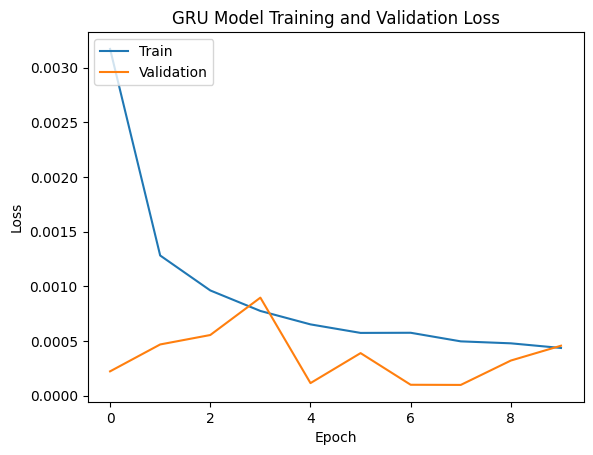

In [ ]:
import keras_tuner as kt
# Define a function to build the GRU model for hyperparameter tuning
def build_model(hp):
    model = Sequential([
        GRU(
            units=hp.Int('units_layer_1', min_value=64, max_value=512, step=64),
            activation='tanh', return_sequences=True, input_shape=(new_step_count, 1)
        ),
        GRU(
            units=hp.Int('units_layer_2', min_value=32, max_value=256, step=32),
            activation='tanh', return_sequences=True
        ),
        GRU(
            units=hp.Int('units_layer_3', min_value=16, max_value=128, step=16),
            activation='tanh', return_sequences=False
        ),
        Dense(units=1)
    ])

    # Compile the model with hyperparameterized learning rate
    model.compile(
        optimizer=RMSprop(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.005, 0.01])),
        loss=Huber()
    )
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='hyperparam_tuning',
    project_name='gru_hyperparam_tuning'
)

# Run the hyperparameter search
tuner.search(X_train_data, y_train_data, epochs=10, batch_size=32, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Optimal Hyperparameters: {best_hps.values}")

# Build the best model using optimal hyperparameters
model_GRU_alt = tuner.hypermodel.build(best_hps)

# Train the best model
GRU_model_alt = model_GRU_alt.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training and validation loss
plt.plot(GRU_model_alt.history['loss'])
plt.plot(GRU_model_alt.history['val_loss'])
plt.title('Optimized GRU Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Optimized_GRU_Model_Loss.png')
plt.show()

## APPLYING THE GRU MODEL

In [ ]:
# Make predictions using the GRU model on the validation set
predictions_alt = model_GRU_alt.predict(X_val_data)
# Reshape the predictions and true values to match the original scale
predictions_scale_alt_original_ = scaler.inverse_transform(predictions_alt.reshape(-1, 1))
y_val_original_scale = scaler.inverse_transform(y_val_data)
# Ensure predictions and true values have the same shape
predictions_original_scale = predictions_scale_alt_original_.flatten()
# Print the shape of predictions and true values
print("Predictions shape:", predictions_original_scale.shape)
print("True values shape:", y_val_original_scale.shape)

30/30 [==============================] - 4s 81ms/step
Predictions shape: (958,)
True values shape: (958, 1)


### GRU MODEL VALIDATION

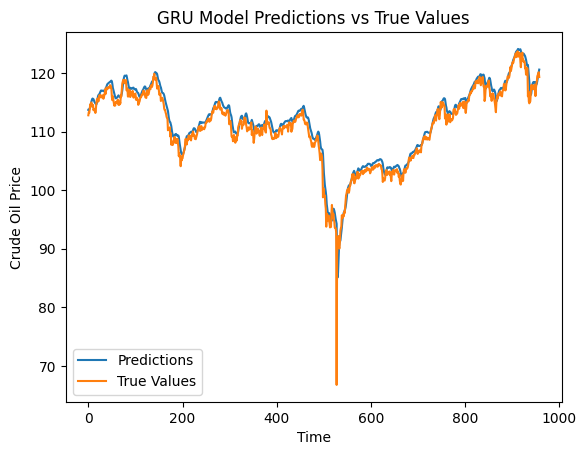

In [ ]:
# Plotting the predicted values on the original scale
plt.plot(predictions_original_scale, label='Predictions')
# Plotting the true values on the original scale
plt.plot(y_val_original_scale, label='True Values')
# Setting the label for the x-axis
plt.xlabel('Time')
# Setting the label for the y-axis
plt.ylabel('Crude Oil Price')
# Setting the title for the plot
plt.title('GRU Model Predictions vs True Values')
# Adding a legend to the plot to distinguish between predictions and true values
plt.legend()
# Displaying the plot
plt.show()

## GRU MODEL EVALUATION ON VALIDATION STAGE

In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape_alt = calculate_mape(y_val_original_scale, predictions_original_scale)
# Calculate Mean Squared Error (MSE)
mse_alt = calculate_mse(y_val_original_scale, predictions_original_scale)
# Calculate Root Mean Square Error (RMSE)
rmse_alt = np.sqrt(mse_alt)
# Calculate R-squared (R²)
r2_alt = r2_score(y_val_original_scale, predictions_original_scale)
# Print the performance metrics
print('Validation phase model performance')
print("RMSE:", rmse_alt)
print("MSE:", mse_alt)
print("MAPE:", mape_alt)
print("R²:", r2_alt)

Validation phase model performance
RMSE: 9.235370432563764
MSE: 85.292067026673
MAPE: 6.62712949546584
R²: 0.9424192419646432


### GRU MODEL TESTING

In [ ]:
# Make predictions using the GRU model on the test set
predictions_test = model_GRU_alt.predict(X_test_data)
# Reshape the predictions and true values to match the original scale
predictions_original_scale_test = scaler.inverse_transform(predictions_test.reshape(-1, 1))
y_test_original_scale = scaler.inverse_transform(y_test_data)
# Ensure predictions and true values have the same shape
predictions_original_scale_test = predictions_original_scale_test.flatten()
# Print the shape of predictions and true values
print("Predictions shape:", predictions_original_scale_test.shape)
print("True values shape:", y_test_original_scale.shape)


19/19 [==============================] - 2s 118ms/step
Predictions shape: (582,)
True values shape: (582, 1)


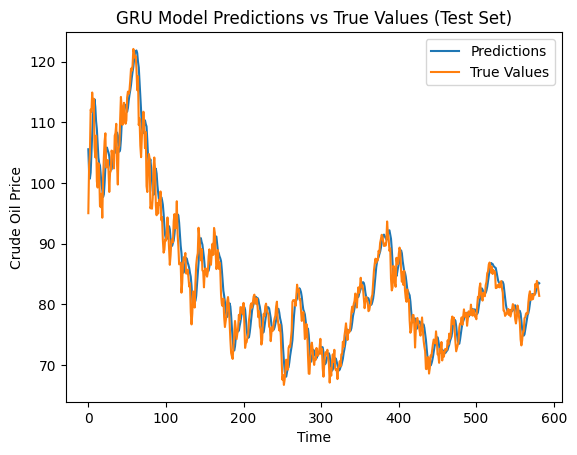

In [ ]:
# Plot the predictions and true values
plt.plot(predictions_original_scale_test, label='Predictions')
plt.plot(y_test_original_scale, label='True Values')
plt.xlabel('Time')
plt.ylabel('Crude Oil Price')
plt.title('GRU Model Predictions vs True Values (Test Set)')
plt.legend()
plt.show()

## GRU MODEL EVALUATION ON TESTING PHASE

In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape_alt = calculate_mape(y_test_original_scale,predictions_original_scale_test)
# Calculate Mean Squared Error (MSE)
mse_alt = calculate_rmse(y_test_original_scale,predictions_original_scale_test)
# Calculate Root Mean Square Error (RMSE)
rmse_alt = np.sqrt(mse_alt)
# Calculate R-squared (R²)
r2_alt = r2_score(y_val_original_scale, predictions_original_scale)
# Print the performance metrics
print('Testing phase model performance')
print("RMSE:", rmse_alt)
print("MSE:", mse_alt)
print("MAPE:", mape_alt)
print("R²:", r2_alt)

Testing phase model performance
RMSE: 4.094511401552659
MSE: 16.765023617444722
MAPE: 14.682583598141937
R²: 0.9424192419646432


In [ ]:
data = crude_price_data.reset_index()


## FUTURE FORECASTING USING GRU MODEL

In [ ]:
import datetime
future_days = 15
lastest_date = pd.to_datetime(data['Date'].iat[-1])
# Generate the list of dates for forecast
next_15_days = [lastest_date + datetime.timedelta(days=i) for i in range(1, future_days + 1)]
# Print the predicted rates for the next month
for date, price in zip(next_15_days[:15], predictions_original_scale_test[-15:]):
    print(f"{date.date()}: {price}")

2024-07-10: 78.5865478515625
2024-07-11: 79.21305084228516
2024-07-12: 80.13206481933594
2024-07-13: 81.08950805664062
2024-07-14: 81.46324920654297
2024-07-15: 81.70906829833984
2024-07-16: 81.68374633789062
2024-07-17: 81.56890106201172
2024-07-18: 81.66473388671875
2024-07-19: 81.78628540039062
2024-07-20: 82.32593536376953
2024-07-21: 82.7802734375
2024-07-22: 83.32280731201172
2024-07-23: 83.60559844970703
2024-07-24: 83.49730682373047


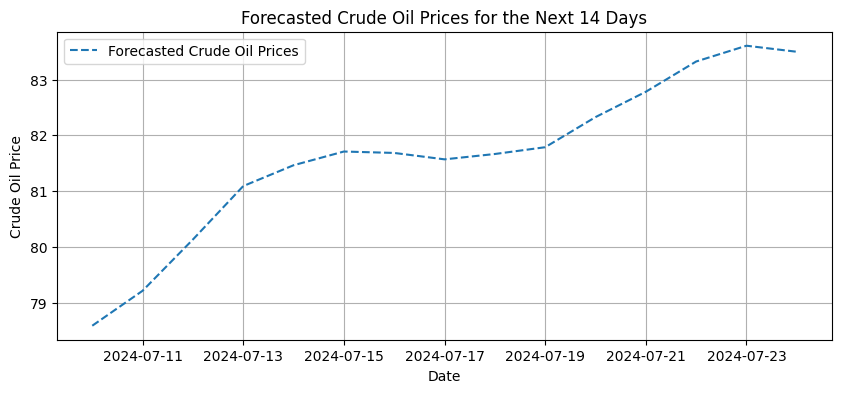

In [ ]:
# Plot the forecasted crude oil prices
plt.figure(figsize=(10, 4))
plt.plot(next_15_days[:15], predictions_original_scale_test[-15:], label='Forecasted Crude Oil Prices', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Forecasted Crude Oil Prices for the Next 14 Days')
plt.legend()
plt.grid(True)
plt.savefig('CrudeOilForecast.png')
plt.show()

### CNN MODEL

Epoch 1/10
61/61 [==============================] - 2s 13ms/step - loss: 0.0038 - val_loss: 5.4075e-04
Epoch 2/10
61/61 [==============================] - 1s 11ms/step - loss: 0.0015 - val_loss: 1.9838e-04
Epoch 3/10
61/61 [==============================] - 1s 9ms/step - loss: 0.0013 - val_loss: 2.4362e-04
Epoch 4/10
61/61 [==============================] - 1s 10ms/step - loss: 0.0010 - val_loss: 2.0058e-04
Epoch 5/10
61/61 [==============================] - 1s 9ms/step - loss: 0.0010 - val_loss: 6.4172e-04
Epoch 6/10
61/61 [==============================] - 1s 9ms/step - loss: 9.0295e-04 - val_loss: 4.9438e-04
Epoch 7/10
61/61 [==============================] - 1s 10ms/step - loss: 7.9875e-04 - val_loss: 2.3896e-04
Epoch 8/10
61/61 [==============================] - 1s 9ms/step - loss: 8.1245e-04 - val_loss: 1.8828e-04
Epoch 9/10
61/61 [==============================] - 1s 10ms/step - loss: 7.0756e-04 - val_loss: 3.7501e-04
Epoch 10/10
61/61 [==============================] - 1s 10ms/

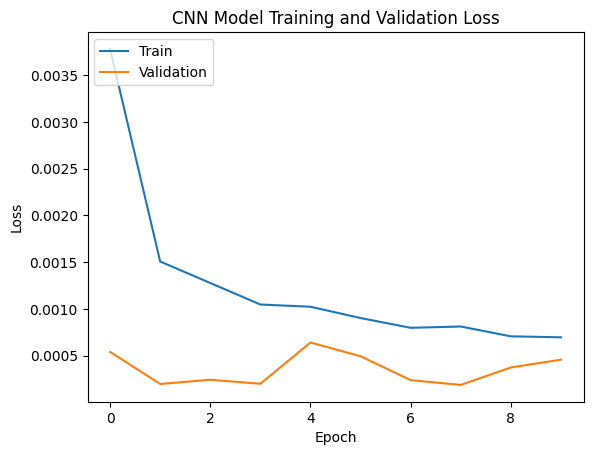

In [ ]:
# Define the CNN model with different parameters
model_CNN_alt = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(new_step_count, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=50, activation='relu'),
    Dense(units=1)
])
# Compile the CNN model with a different optimizer (RMSprop) and loss (Huber)
model_CNN_alt.compile(optimizer=RMSprop(learning_rate=0.001), loss=Huber())
# Train the CNN model with the new configuration
CNN_model_alt = model_CNN_alt.fit(X_train_data, y_train_data, epochs=10, batch_size=64, validation_split=0.1)
# Plot the training and validation loss
plt.plot(CNN_model_alt.history['loss'])
plt.plot(CNN_model_alt.history['val_loss'])
plt.title('CNN Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('CNN_Model_Loss.png')  # Save the plot as PNG
plt.show()

## CNN MODEL PERFORMANCE IN VALIDATION DATASET

30/30 [==============================] - 0s 3ms/step
Predictions shape: (958,)
True values shape: (958, 1)


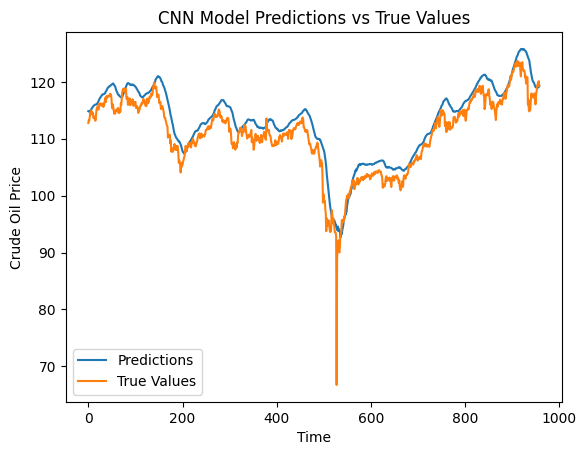

In [ ]:
# Make predictions using the CNN model on the validation set
predictions_alt_cnn = model_CNN_alt.predict(X_val_data)

# Reshape the predictions and true values to match the original scale
predictions_original_scale_alt_cnn = scaler.inverse_transform(predictions_alt_cnn.reshape(-1, 1))
y_val_original_scale_alt_cnn = scaler.inverse_transform(y_val_data)

# Ensure predictions and true values have the same shape
predictions_original_scale_alt_cnn = predictions_original_scale_alt_cnn.flatten()

# Print the shape of predictions and true values
print("Predictions shape:", predictions_original_scale_alt_cnn.shape)
print("True values shape:", y_val_original_scale_alt_cnn.shape)

# Plot the predictions and true values
plt.plot(predictions_original_scale_alt_cnn, label='Predictions')
plt.plot(y_val_original_scale_alt_cnn, label='True Values')
plt.xlabel('Time')
plt.ylabel('Crude Oil Price')
plt.title('CNN Model Predictions vs True Values')
plt.legend()
plt.show()


## EVALUATION METRICS IN VALIDATION SET

In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape_alt_cnn = calculate_mape(y_val_original_scale_alt_cnn, predictions_original_scale_alt_cnn)
# Calculate Mean Squared Error (MSE)
mse_alt_cnn = calculate_rmse(y_val_original_scale_alt_cnn, predictions_original_scale_alt_cnn)
# Calculate Root Mean Square Error (RMSE)
rmse_alt_cnn = np.sqrt(mse_alt_cnn)
r2_alt_cnn = r2_score(y_val_original_scale_alt_cnn, predictions_original_scale_alt_cnn)
# Print the performance metrics
print('Validation phase model performance')
print("RMSE:", rmse_alt_cnn)
print("MSE:", mse_alt_cnn)
print("MAPE:", mape_alt_cnn)
print("R2 Square:", r2_alt_cnn)

Validation phase model performance
RMSE: 3.0732841253808814
MSE: 9.44507531531813
MAPE: 6.851725346614692
R2 Square: 0.8074385128186745


In [ ]:
# Make predictions using the CNN model on the test set
predictions_test_cnn = model_CNN_alt.predict(X_test_data)
# Reshape the predictions and true values to match the original scale
predictions_original_scale_test_cnn = scaler.inverse_transform(predictions_test_cnn.reshape(-1, 1))
y_test_original_scale_cnn = scaler.inverse_transform(y_test_data)
# Ensure predictions and true values have the same shape
predictions_original_scale_test_cnn = predictions_original_scale_test_cnn.flatten()
# Print the shape of predictions and true values
print("Predictions shape:", predictions_original_scale_test_cnn.shape)
print("True values shape:", y_test_original_scale_cnn.shape)


19/19 [==============================] - 0s 3ms/step
Predictions shape: (582,)
True values shape: (582, 1)


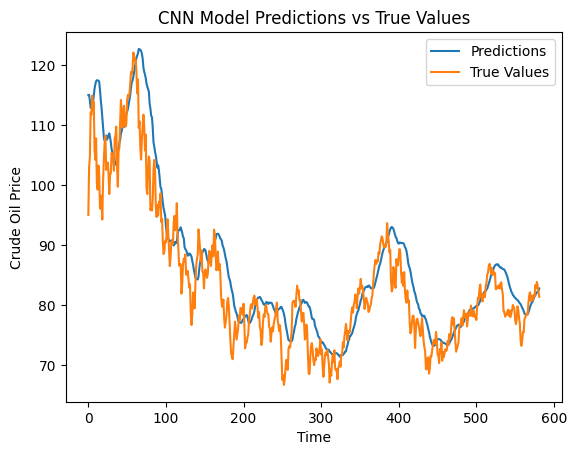

In [ ]:
# Plot the predictions and true values
plt.plot(predictions_original_scale_test_cnn, label='Predictions')
plt.plot(y_test_original_scale_cnn, label='True Values')
plt.xlabel('Time')
plt.ylabel('Crude Oil Price')
plt.title('CNN Model Predictions vs True Values')
plt.legend()
plt.show()

## FINDING CNN MODEL PERFORMANCE IN TESTING PHASE

In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape_alt_cnn = calculate_mape(y_test_original_scale_cnn, predictions_original_scale_test_cnn)
# Calculate Mean Squared Error (MSE)
mse_alt_cnn = calculate_rmse(y_test_original_scale_cnn, predictions_original_scale_test_cnn)
# Calculate Root Mean Square Error (RMSE)
rmse_alt_cnn = np.sqrt(mse_alt_cnn)
r2_alt_cnn_test = r2_score(y_test_original_scale_cnn, predictions_original_scale_test_cnn)
# Print the performance metrics
print('Test phase model performance')
print("RMSE:", rmse_alt_cnn)
print("MSE:", mse_alt_cnn)
print("MAPE:", mape_alt_cnn)
print("R2 Square:", r2_alt_cnn_test)

Test phase model performance
RMSE: 4.190066142112225
MSE: 17.556654275275225
MAPE: 15.426032590034925
R2 Square: 0.7900320051638027


## FUTURE FORECASTING USING CNN MODEL

In [ ]:
import datetime
num_future_days = 15
lastest_date = pd.to_datetime(data['Date'].iat[-1])
# Generate the list of dates for forecast
next_15_days = [lastest_date + datetime.timedelta(days=i) for i in range(1, num_future_days + 1)]
# Print the predicted rates for the next month
for date, price in zip(next_15_days[:15], predictions_original_scale_test_cnn[-15:]):
    print(f"{date.date()}: {price}")

2024-07-10: 78.79925537109375
2024-07-11: 79.16996765136719
2024-07-12: 79.68409729003906
2024-07-13: 80.02012634277344
2024-07-14: 80.3645248413086
2024-07-15: 80.500244140625
2024-07-16: 80.79867553710938
2024-07-17: 81.21573638916016
2024-07-18: 81.50301361083984
2024-07-19: 81.69456481933594
2024-07-20: 81.97612762451172
2024-07-21: 82.16962432861328
2024-07-22: 82.25083923339844
2024-07-23: 82.45594024658203
2024-07-24: 82.80850219726562


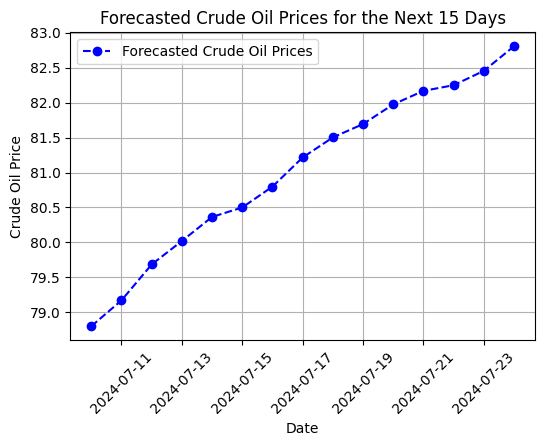

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(next_15_days[:15], predictions_original_scale_test_cnn[-15:], label='Forecasted Crude Oil Prices', linestyle='dashed', marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Forecasted Crude Oil Prices for the Next 15 Days')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## ARIMA MODEL

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00


## USING DICKEY FULLER TEST

In [ ]:
# Perform the Dickey-Fuller test to check for stationarity
result = adfuller(crude_price_data['Adj Close'])
# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.757076368900011
p-value: 0.06467149957233566
Critial Values:
   1%, -3.431446934404289
Critial Values:
   5%, -2.862024743637142
Critial Values:
   10%, -2.567028026658723


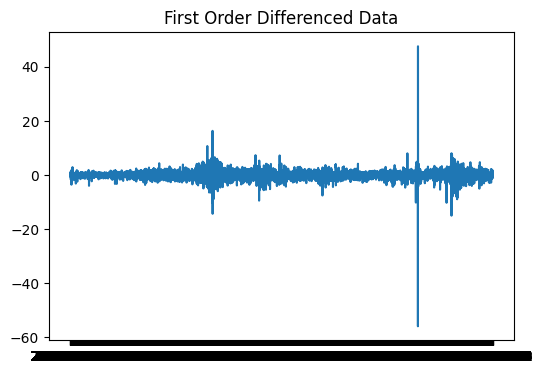

ADF Statistic: -12.754964724968678
p-value: 8.37779396869621e-24
Critical Values:
   1%, -3.431446934404289
   5%, -2.862024743637142
   10%, -2.567028026658723
The differenced data is stationary.


In [ ]:
# Perform first-order differencing
df_diff = crude_price_data['Adj Close'].diff().dropna()
# Plot the differenced data
plt.figure(figsize=(6,4))
plt.plot(df_diff)
plt.title('First Order Differenced Data')
plt.show()
# Perform ADF test on differenced data
result_diff = adfuller(df_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'   {key}, {value}')
# Check if the differenced data is stationary
if result_diff[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is not stationary.")

## PLOTTING ACF AND PACF

<Figure size 600x400 with 0 Axes>

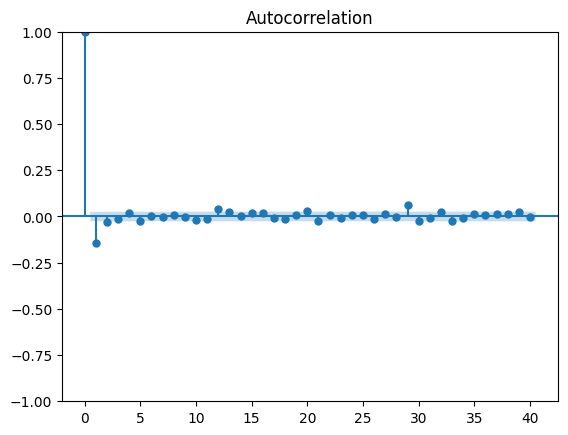

In [ ]:
# Plot ACF
plt.figure(figsize=(6,4))
plot_acf(df_diff, lags=40)
plt.show()

<Figure size 600x400 with 0 Axes>

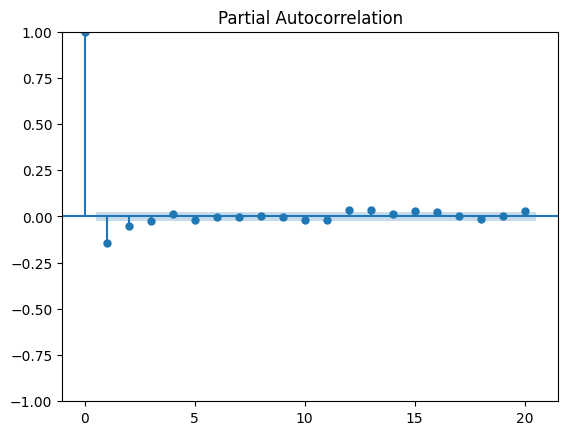

In [ ]:
# Plot PACF
plt.figure(figsize=(6,4))
plot_pacf(df_diff, lags=20, method='ywm')
plt.show()

In [ ]:
# Calculate and print the standard deviation
std_dev = np.std(df_diff)
print(f'Standard Deviation of the Differenced Data: {std_dev:.2f}')

Standard Deviation of the Differenced Data: 1.81


In [ ]:
stepwise_fit = auto_arima(train["Adj Close"], trace=True,suppress_warnings=True, seasonal=False)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15562.116, Time=7.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15577.253, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15567.759, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15567.276, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15575.342, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15568.967, Time=3.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15569.709, Time=2.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15564.948, Time=5.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15568.281, Time=1.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15565.823, Time=3.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15571.694, Time=0.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=15562.943, Time=12.96 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=15560.208, Time=6.04 sec
 ARIMA(1,1,2)(0,0,0)[0] 

## VALIDATION DATASET PERFORMANCE

In [ ]:
# Forecast the validation set
val_forecast = stepwise_fit.predict(n_periods=len(validation))
validation['Forecast'] = val_forecast
# Combine train and validation for final model fitting
train_val = pd.concat([train, validation])
# Fit the final ARIMA model on combined train and validation data
final_model = ARIMA(train_val['Adj Close'], order=stepwise_fit.order)
final_model_fit = final_model.fit()
# Forecast the test set
test_forecast = final_model_fit.forecast(steps=len(test))
test['Forecast'] = test_forecast

## ARIMA MODEL PERFORMANCE EVALUATION IN VALIDATION PHASE

In [ ]:
# Calculate performance metrics on the validation set
y_val_original_scale = validation['Adj Close']
predictions_val_original_scale = validation['Forecast']

mape_val = calculate_mape(y_val_original_scale, predictions_val_original_scale)
mse_val = calculate_mse(y_val_original_scale, predictions_val_original_scale)
rmse_val = calculate_rmse(y_val_original_scale, predictions_val_original_scale)
r2_val = calculate_r2(y_val_original_scale, predictions_val_original_scale)

# Print the performance metrics for validation data
print('Validation phase model performance')
print("MAPE:", mape_val)
print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("R²:", r2_val)

Validation phase model performance
MAPE: 25.239422186688355
MSE: 197.76235539685882
RMSE: 14.062800410901763
R²: -0.05102170059145972


## ARIMA MODEL PERFORMANCE VALUATION IN TESTING PHASE

In [ ]:
# Calculate performance metrics on the test set
y_test_original_scale = test['Adj Close']
predictions_test_original_scale = test['Forecast']
mape_test = calculate_mape(y_test_original_scale, predictions_test_original_scale)
mse_test = calculate_mse(y_test_original_scale, predictions_test_original_scale)
rmse_test = calculate_rmse(y_test_original_scale, predictions_test_original_scale)
r2_test = calculate_r2(y_test_original_scale, predictions_test_original_scale)
# Print the performance metrics for test data
print('Test phase model performance')
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R²:", r2_test)

Test phase model performance
MAPE: 11.059004936438194
MSE: 222.3582335109348
RMSE: 14.91168110948376
R²: -0.5704762535226937


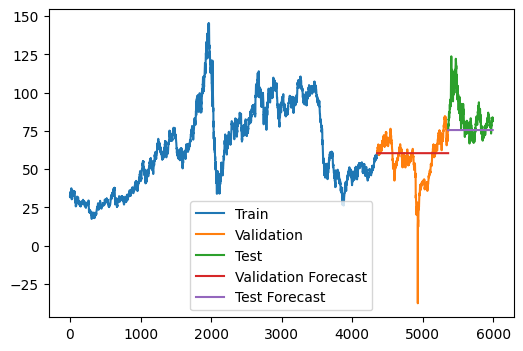

In [ ]:
# Plot the results
plt.figure(figsize=(6,4))
plt.plot(train['Adj Close'], label='Train')
plt.plot(validation['Adj Close'], label='Validation')
plt.plot(test['Adj Close'], label='Test')
plt.plot(validation['Forecast'], label='Validation Forecast')
plt.plot(test['Forecast'], label='Test Forecast')
plt.legend()
plt.show()

In [ ]:
import datetime
num_future_days = 15
lastest_date = pd.to_datetime(data['Date'].iat[-1])
# Generate the list of dates for forecast
next_15_days = [lastest_date + datetime.timedelta(days=i) for i in range(1, num_future_days + 1)]
# Print the predicted rates for the next month
for date, price in zip(next_15_days[:15], y_test_original_scale[-15:]):
    print(f"{date.date()}: {price}")

2024-07-10: 80.33000183105469
2024-07-11: 81.56999969482422
2024-07-12: 82.16999816894531
2024-07-13: 80.7300033569336
2024-07-14: 81.62999725341797
2024-07-15: 80.83000183105469
2024-07-16: 80.9000015258789
2024-07-17: 81.73999786376953
2024-07-18: 81.54000091552734
2024-07-19: 83.37999725341797
2024-07-20: 82.80999755859375
2024-07-21: 83.87999725341797
2024-07-22: 83.16000366210938
2024-07-23: 82.33000183105469
2024-07-24: 81.41000366210938


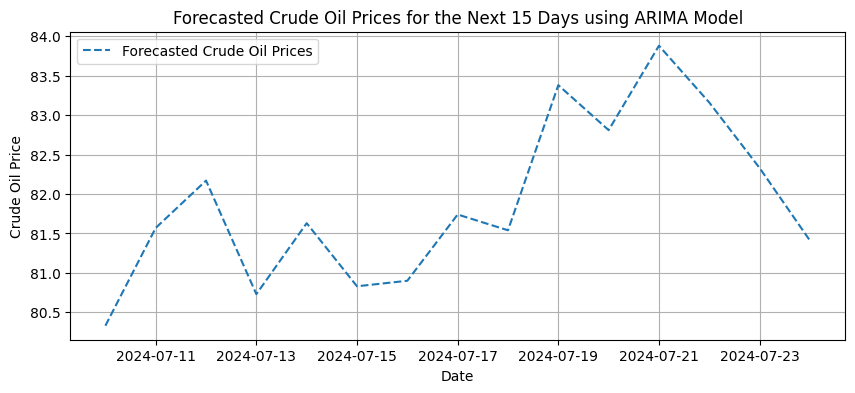

In [ ]:
# Plot the forecasted crude oil prices
plt.figure(figsize=(10, 4))
plt.plot(next_15_days[:15], y_test_original_scale[-15:], label='Forecasted Crude Oil Prices', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Forecasted Crude Oil Prices for the Next 15 Days using ARIMA Model')
plt.legend()
plt.grid(True)
plt.savefig('CrudeOilForecast.png')
plt.show()

## Fetch Crude Oil Prices and External Factors

[*********************100%***********************]  1 of 1 completed


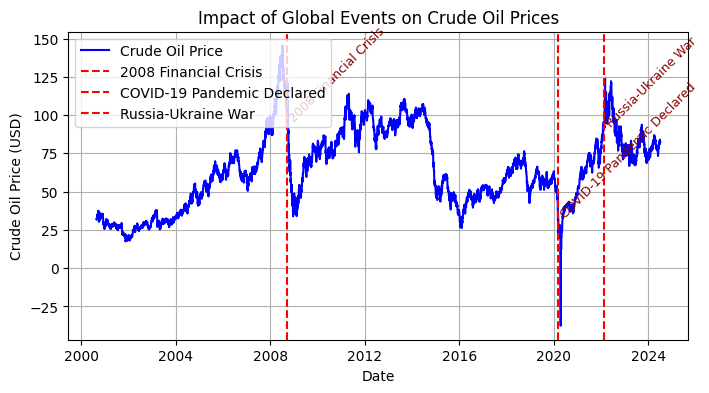

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch Crude Oil Prices
crude_oil_symbol = "CL=F"  # Crude oil futures
start_date = "2000-01-01"
end_date = "2024-07-09"

# Download crude oil price data
crude_data = yf.download(crude_oil_symbol, start=start_date, end=end_date)

# Ensure the 'Date' column is a datetime type
crude_data.reset_index(inplace=True)

# Step 2: Define Global Events
global_events = [
    {"Event": "2008 Financial Crisis", "Date": "2008-09-15"},
    {"Event": "COVID-19 Pandemic Declared", "Date": "2020-03-11"},
    {"Event": "Russia-Ukraine War", "Date": "2022-02-24"},
]

# Convert global event dates to DataFrame
events_df = pd.DataFrame(global_events)
events_df['Date'] = pd.to_datetime(events_df['Date'])

# Step 3: Merge Events with Crude Oil Prices
crude_data['Date'] = pd.to_datetime(crude_data['Date'])
crude_data.set_index('Date', inplace=True)

# Add event markers to the crude oil price data
crude_data['Event'] = None
for event in global_events:
    event_date = pd.to_datetime(event['Date'])
    if event_date in crude_data.index:
        crude_data.loc[event_date, 'Event'] = event['Event']

# Step 4: Visualize the Impact of Events
plt.figure(figsize=(8,4))
plt.plot(crude_data.index, crude_data['Close'], label="Crude Oil Price", color='blue')
for event in global_events:
    event_date = pd.to_datetime(event['Date'])
    if event_date in crude_data.index:
        plt.axvline(x=event_date, color='red', linestyle='--', label=event['Event'])

# Annotate the events on the chart
for _, row in events_df.iterrows():
    plt.text(row['Date'], crude_data.loc[row['Date'], 'Close'], row['Event'], fontsize=9, color='darkred', rotation=45)

plt.title("Impact of Global Events on Crude Oil Prices")
plt.xlabel("Date")
plt.ylabel("Crude Oil Price (USD)")
plt.legend(loc="upper left")
plt.grid()
plt.show()






## REFERENCES:
1)  https://www.kaggle.com

2)  https://github.com

3)  https://stackoverflow.com


```
# This is formatted as code
```

